In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('twitter_human_bots_dataset.csv')

In [4]:
df.head()

,Unnamed: 0,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


In [5]:
df.describe()

,Unnamed: 0,favourites_count,followers_count,friends_count,id,statuses_count,average_tweets_per_day,account_age_days
count,37438.000000,37438.000000,3.743800e+04,3.743800e+04,3.743800e+04,3.743800e+04,37438.000000,37438.000000
mean,18718.500000,12302.062183,3.703098e+05,4.445925e+03,1.221536e+17,2.107339e+04,6.891668,3022.128052
std,10807.564026,33923.650237,2.470829e+06,4.954520e+04,3.004313e+17,6.732977e+04,24.580116,1013.695870
min,0.000000,0.000000,0.000000e+00,0.000000e+00,4.180000e+02,0.000000e+00,0.000000,483.000000
25%,9359.250000,362.000000,3.500000e+01,3.700000e+01,9.957306e+07,1.336250e+03,0.495000,2316.250000
50%,18718.500000,2066.000000,3.650000e+02,2.960000e+02,3.991474e+08,4.209000e+03,1.488000,3219.000000
75%,28077.750000,8879.000000,8.440250e+03,8.930000e+02,2.453826e+09,1.715375e+04,5.528000,3888.000000
max,37437.000000,885123.000000,1.216415e+08,4.343060e+06,1.120974e+18,2.771910e+06,1269.055000,5158.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37438 entries, 0 to 37437
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    37438 non-null  int64  
 1   created_at                    37438 non-null  object 
 2   default_profile               37438 non-null  bool   
 3   default_profile_image         37438 non-null  bool   
 4   description                   30182 non-null  object 
 5   favourites_count              37438 non-null  int64  
 6   followers_count               37438 non-null  int64  
 7   friends_count                 37438 non-null  int64  
 8   geo_enabled                   37438 non-null  bool   
 9   id                            37438 non-null  int64  
 10  lang                          29481 non-null  object 
 11  location                      37435 non-null  object 
 12  profile_background_image_url  32939 non-null  object 
 13  p

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
X = df.drop(['Unnamed: 0', 'created_at','default_profile','default_profile_image','description','geo_enabled','lang','location','profile_background_image_url','profile_image_url','screen_name','verified','account_type'],axis=1)
y = df.account_type

le = LabelEncoder()
le.fit(y)
y = le.fit_transform(y)

X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [24]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_proba = knn.predict_proba(X_test)

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
scores = []

for n in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=n, n_jobs=-1)
    knn.fit(X_train, y_train)
    knn_preds = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))

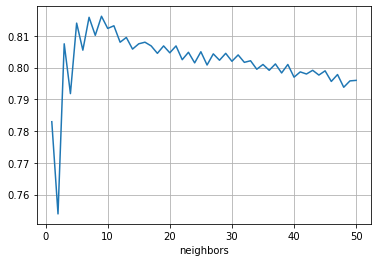

In [26]:
import matplotlib.pyplot as plt

plt.plot(np.arange(1,51), scores)
plt.xlabel('neighbors')
plt.grid()

In [27]:
# score for 5 neighbors
knn.score(X_test, y_test)
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

[[1483  497]
 [ 725 3285]]
              precision    recall  f1-score   support

           0       0.67      0.75      0.71      1980
           1       0.87      0.82      0.84      4010

    accuracy                           0.80      5990
   macro avg       0.77      0.78      0.78      5990
weighted avg       0.80      0.80      0.80      5990



In [28]:
X_holdout = scaler.transform(X_holdout)

knn = KNeighborsClassifier(n_neighbors=16, n_jobs=-1)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_holdout)
knn_proba = knn.predict_proba(X_holdout)

print(confusion_matrix(y_holdout, knn_preds))
print(classification_report(y_holdout, knn_preds))

[[1847  640]
 [ 808 4193]]
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2487
           1       0.87      0.84      0.85      5001

    accuracy                           0.81      7488
   macro avg       0.78      0.79      0.79      7488
weighted avg       0.81      0.81      0.81      7488

